#### Explore 2D Imaging Properties Exo

In the following exercice, you'll learn how to use the python package pydicom to extact imaging data from a DICOM file. Similar to how looked at images and their intensity distribution in lesson 1. 
You'll do this again but also before and after normalizing the image's intensity values.

You will be provided with a dataframe that contains bouding box coordinates for masses that have been identified by a radiologist in three separate DICOM images. The dataframe gives the starting X & Y coordinates of the bounding box around each mass, and the width and height of the mass. These four values should allow you to identify to specific rectangular section of each image that contains suspicious mass.

Your job here will be to extact the imaging data from each DICOM, visualize it, normalize it, and then visualize only the section of the image that contains the suspecious mass. Throughout this process, you should be drawing insights about whether or not intensity values are a particularly good characteristic of masses that might help a machine learning algorithm automatically identify them.

In [1]:
%matplotlib notebook
import pandas as pd 
import numpy as np 
import pydicom 
import skimage
import matplotlib.pyplot as plt

##### Frist, read your dataframe of images with bounding box coordinates

In [2]:
bbox=pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [3]:
bbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3 non-null      int64  
 1   Image Index    3 non-null      object 
 2   Finding Label  3 non-null      object 
 3   Bbox [x        3 non-null      float64
 4   y              3 non-null      float64
 5   w              3 non-null      float64
 6   h]             3 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 296.0+ bytes


##### 1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function

In [4]:
my_dicom_005=pydicom.dcmread('dicom_00029579_005.dcm')
my_dicom_019=pydicom.dcmread('dicom_00013659_019.dcm')
my_dicom_033=pydicom.dcmread('dicom_00023075_033.dcm')

In [5]:
my_dicom_005

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.162426174634548301003630270411628292460952
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.162426174634548301003630270411628292460952
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Effusion|Nodule|Pleural_Thicken

##### 2. Visualize the image using plt.imshow

<IPython.core.display.Javascript object>


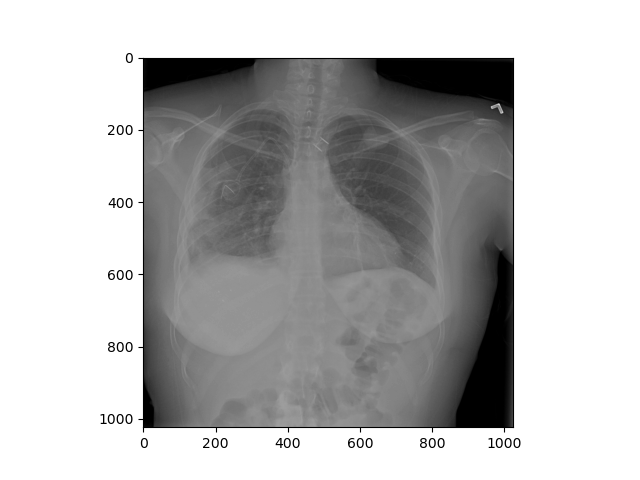

In [17]:
plt.imshow(my_dicom_005.pixel_array, cmap='gray')

<IPython.core.display.Javascript object>


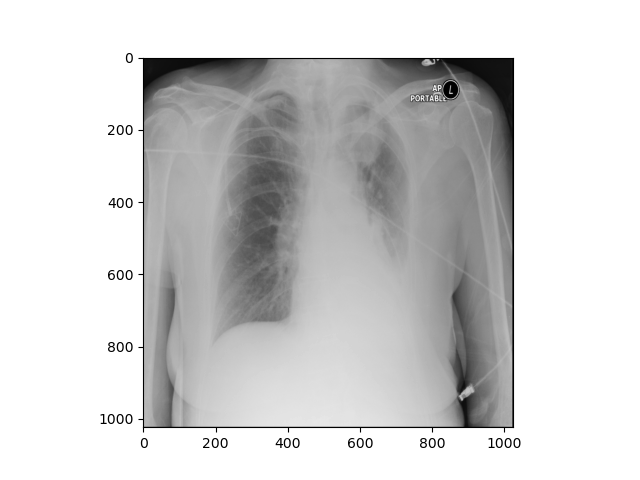

In [18]:
plt.imshow(my_dicom_019.pixel_array, cmap='gray')

<IPython.core.display.Javascript object>


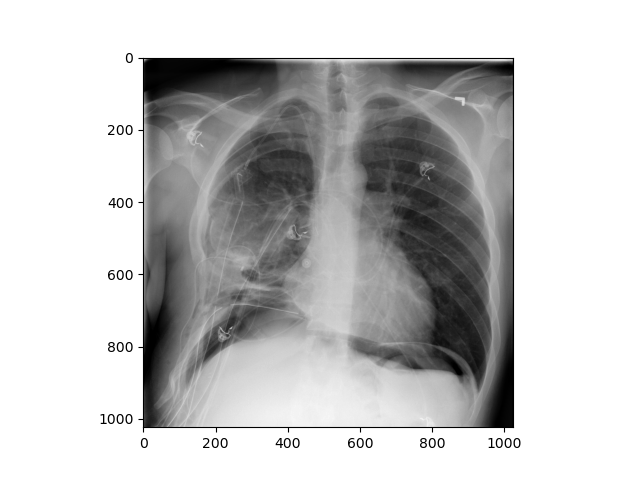

In [19]:
plt.imshow(my_dicom_033.pixel_array, cmap='gray')

In [20]:
### Images array 
my_dicom_005_image=my_dicom_005.pixel_array
my_dicom_033_image=my_dicom_033.pixel_array
my_dicom_019_image=my_dicom_019.pixel_array

In [21]:
# Print the array
print(my_dicom_019_image)

[[  5   8   8 ...  17   6   0]
 [ 10  18  17 ...  36  14   0]
 [  9  17  16 ...  35  13   0]
 ...
 [107 189 183 ... 197  70   0]
 [111 197 187 ... 210  74   0]
 [ 53  94  89 ... 101  36   0]]


###### 3. Plot a histogram of the image pixel intensity values

<IPython.core.display.Javascript object>


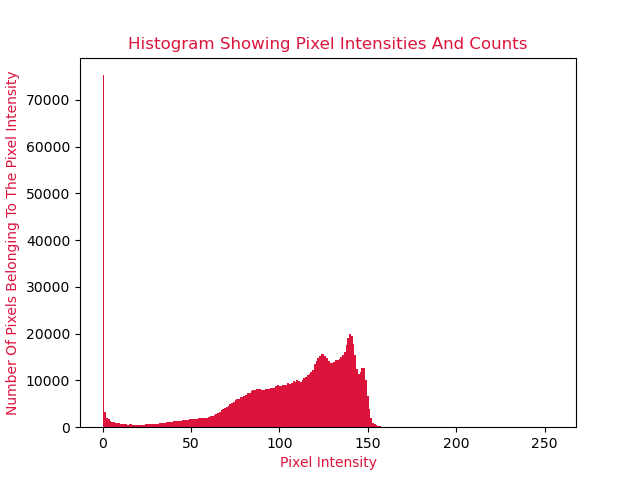

In [22]:
import matplotlib.pyplot as plt
plt.hist(x=my_dicom_005_image.ravel(), bins=256, color='crimson')
plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()

<IPython.core.display.Javascript object>


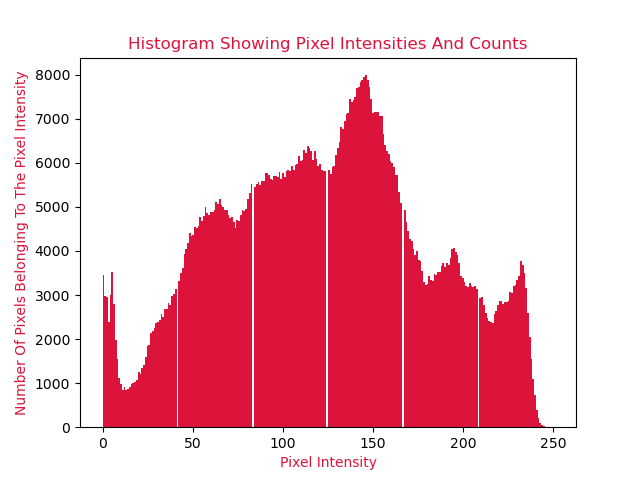

In [23]:
import matplotlib.pyplot as plt
plt.hist(x=my_dicom_033_image.ravel(), bins=256, color='crimson')
plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()

<IPython.core.display.Javascript object>


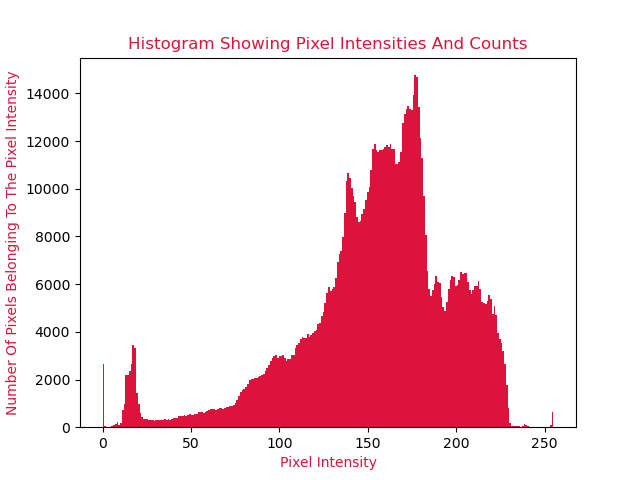

In [24]:
plt.hist(x=my_dicom_019_image.ravel(), bins=256, color='crimson')
plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()

##### 3. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:

(X - X_mean)/X_std_dev

In [15]:
print(my_dicom_005_image)
print(my_dicom_033_image)
print(my_dicom_019_image)

[[21 20 19 ... 95 96 96]
 [21 21 19 ... 79 81 80]
 [23 21 17 ... 72 72 71]
 ...
 [10 10 10 ... 67 71 76]
 [11 11 11 ... 68 72 77]
 [13 12 12 ... 67 73 76]]
[[219 214 219 ... 207 220 145]
 [217 215 216 ... 203 216 141]
 [211 212 211 ... 205 216 142]
 ...
 [ 60  61  59 ...   9   6   0]
 [ 62  60  59 ...   9   6   0]
 [ 62  59  57 ...   9   6   0]]
[[  5   8   8 ...  17   6   0]
 [ 10  18  17 ...  36  14   0]
 [  9  17  16 ...  35  13   0]
 ...
 [107 189 183 ... 197  70   0]
 [111 197 187 ... 210  74   0]
 [ 53  94  89 ... 101  36   0]]


In [26]:
# Mean 
my_dicom_005_image_mean=my_dicom_005_image.mean()
my_dicom_033_image_mean=my_dicom_033_image.mean()
my_dicom_019_image_mean=my_dicom_019_image.mean()

#Std 
my_dicom_005_image_std=my_dicom_005_image.std()
my_dicom_033_image_std=my_dicom_033_image.std()
my_dicom_019_image_std=my_dicom_019_image.std()

In [29]:
#Print Mean 
print(my_dicom_005_image_mean)
print(my_dicom_033_image_mean)
print(my_dicom_019_image_mean)

101.89211559295654
123.25588417053223
155.60211944580078


In [30]:
# Print Std
print(my_dicom_005_image_std)
print(my_dicom_033_image_std)
print(my_dicom_019_image_std)

41.3243239684574
57.47256019573095
43.776203799182035


##### Plot de Normlized array 

In [38]:
# Normalised 
my_dicom_005_image_normalised=(my_dicom_005_image - my_dicom_005_image_mean)/my_dicom_005_image_std
my_dicom_033_image_normalised=(my_dicom_033_image - my_dicom_033_image_mean)/my_dicom_033_image_std
my_dicom_019_image_normalised=(my_dicom_019_image - my_dicom_019_image_mean)/my_dicom_019_image_std


In [39]:
#Print the Normalized array
print(my_dicom_005_image_normalised)
print(my_dicom_033_image_normalised)
print(my_dicom_019_image_normalised)

[[-1.95749398 -1.98169281 -2.00589163 ... -0.16678109 -0.14258226
  -0.14258226]
 [-1.95749398 -1.95749398 -2.00589163 ... -0.55396225 -0.50556461
  -0.52976343]
 [-1.90909634 -1.95749398 -2.05428928 ... -0.72335401 -0.72335401
  -0.74755284]
 ...
 [-2.22368104 -2.22368104 -2.22368104 ... -0.84434813 -0.74755284
  -0.62655872]
 [-2.19948221 -2.19948221 -2.19948221 ... -0.82014931 -0.72335401
  -0.6023599 ]
 [-2.15108457 -2.17528339 -2.17528339 ... -0.84434813 -0.69915519
  -0.62655872]]
[[ 1.66591005  1.57891202  1.66591005 ...  1.45711476  1.68330966
   0.37833908]
 [ 1.63111084  1.59631162  1.61371123 ...  1.38751633  1.61371123
   0.30874065]
 [ 1.52671319  1.5441128   1.52671319 ...  1.42231555  1.61371123
   0.32614026]
 ...
 [-1.10062757 -1.08322796 -1.11802718 ... -1.98800756 -2.04020638
  -2.14460403]
 [-1.06582835 -1.10062757 -1.11802718 ... -1.98800756 -2.04020638
  -2.14460403]
 [-1.06582835 -1.11802718 -1.15282639 ... -1.98800756 -2.04020638
  -2.14460403]]
[[-3.44027363 -3

<IPython.core.display.Javascript object>


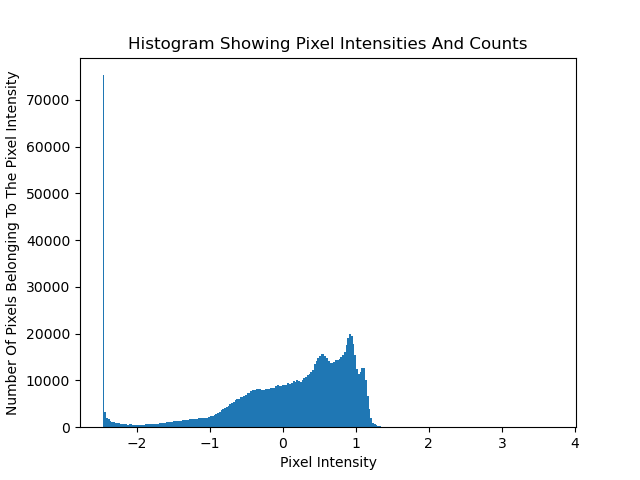

In [34]:
# Plot de normalized values 
plt.hist(x=my_dicom_005_image_normalised.ravel(), bins=256)
plt.title("Histogram Showing Pixel Intensities And Counts")
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity")
plt.xlabel("Pixel Intensity")
plt.show()

<IPython.core.display.Javascript object>


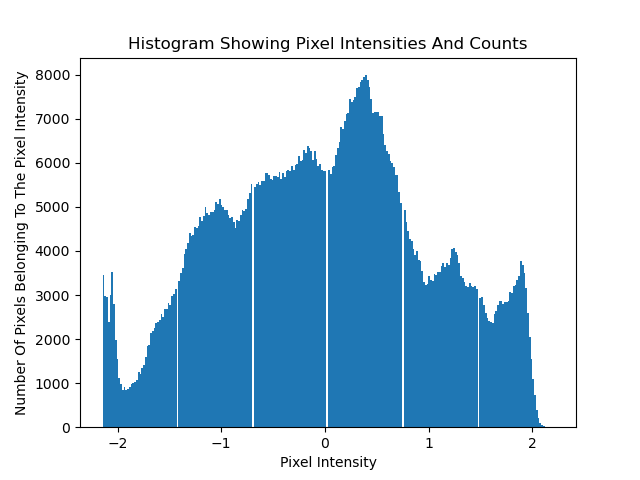

In [40]:
plt.hist(x=my_dicom_033_image_normalised.ravel(), bins=256)
plt.title("Histogram Showing Pixel Intensities And Counts")
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity")
plt.xlabel("Pixel Intensity")
plt.show()

<IPython.core.display.Javascript object>


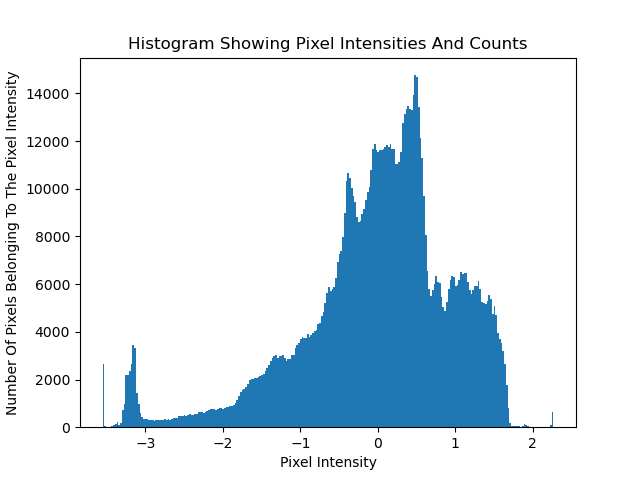

In [41]:
plt.hist(x=my_dicom_019_image_normalised.ravel(), bins=256)
plt.title("Histogram Showing Pixel Intensities And Counts")
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity")
plt.xlabel("Pixel Intensity")
plt.show()

##### 6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow

In [42]:
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [43]:
my_dicom_033_image

array([[219, 214, 219, ..., 207, 220, 145],
       [217, 215, 216, ..., 203, 216, 141],
       [211, 212, 211, ..., 205, 216, 142],
       ...,
       [ 60,  61,  59, ...,   9,   6,   0],
       [ 62,  60,  59, ...,   9,   6,   0],
       [ 62,  59,  57, ...,   9,   6,   0]], dtype=uint8)

<IPython.core.display.Javascript object>


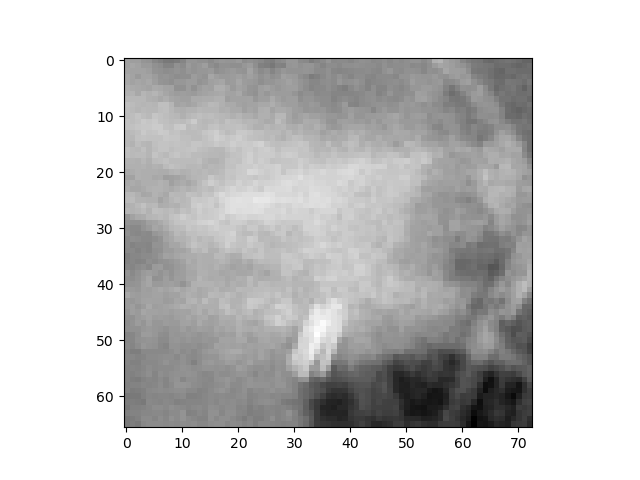

In [46]:
plt.imshow(my_dicom_033_image[535:(535+66),240:(240+73)],cmap='gray')

##### 7. Plot a histogram of the normalized intensensity of the mass within the coordinates

<IPython.core.display.Javascript object>


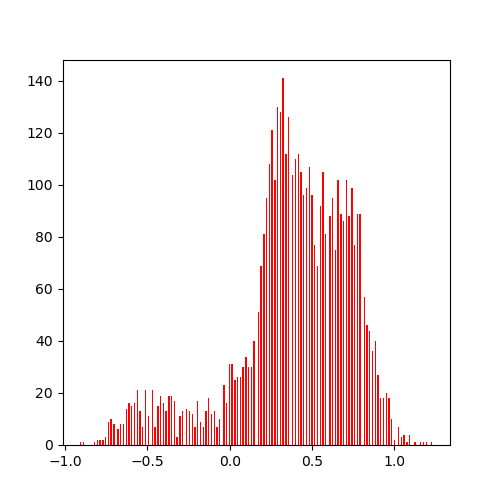

In [47]:
plt.figure(figsize=(5,5))
plt.hist(my_dicom_033_image_normalised[535:(535+66),240:(240+73)].ravel(), bins = 256,color='red')
plt.show()

What does this tell us? It tell us that the intensity values of the mass are higher than the image mean, but mostly fall within a single standard deviation of the image intensity values. This tell us that using some sort of thresholding mechanism to identify tumors in an image would probably not be appropriate, because the mass's intensity values are not that different from the rest of the image.